In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv('/content/kidney_disease.csv')
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
data['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [ ]:
data['classification']=data['classification'].replace('ckd\t','ckd')
data['classification'].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

In [ ]:
data=data.drop(['id'],axis=1)
data=data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [ ]:
data['dm'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

data['cad'] = data['cad'].replace(to_replace = '\tno', value='no')
data['pcv'] = pd.to_numeric(data['pcv'], errors='coerce')
data['wc'] = pd.to_numeric(data['wc'], errors='coerce')
data['rc'] = pd.to_numeric(data['rc'], errors='coerce')

In [ ]:
data["sc"].head()

0    1.2
1    0.8
2    1.8
3    3.8
4    1.4
Name: sc, dtype: float64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             329 non-null    float64
 16  wc              294 non-null    float64
 17  rc              269 non-null    flo

In [ ]:
continuous_features = []
discrete_features = []
for i in data:
  if data[i].dtype != 'object':
    continuous_features.append(i)
  else:
    discrete_features.append(i)
continuous_features.remove("su")
continuous_features.remove("al")
discrete_features.append("su")
discrete_features.append("al")
print(continuous_features)
print(discrete_features)

['age', 'bp', 'sg', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification', 'su', 'al']


In [ ]:
for i in data:
  print(i)
  unique_values = data[i].unique()
  print(unique_values)

age
[48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
bp
[ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
sg
[1.02  1.01  1.005 1.015   nan 1.025]
al
[ 1.  4.  2.  3.  0. nan  5.]
su
[ 0.  3.  4.  1. nan  2.  5.]
rbc
[nan 'normal' 'abnormal']
pc
['normal' 'abnormal' nan]
pcc
['notpresent' 'present' nan]
ba
['notpresent' 'present' nan]
bgr
[121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158.
 165. 132. 104. 127. 415. 169. 251. 109. 280. 210. 219. 295.  94. 172.
 101. 298. 153.  88. 226. 143. 1

In [ ]:
data['classification'] = data['classification'].map({'ckd': 1, 'notckd': 0})
data['rbc'] = data['rbc'].map({'normal': 1, 'abnormal': 0})
data['pc'] = data['pc'].map({'normal': 1, 'abnormal': 0})
data['pcc'] = data['pcc'].map({'present': 1, 'notpresent': 0})
data['ba'] = data['ba'].map({'present': 1, 'notpresent': 0})
data['htn'] = data['htn'].map({'yes': 1, 'no': 0})
data['dm'] = data['dm'].map({'yes': 1, 'no': 0})
data['cad'] = data['cad'].map({'yes': 1, 'no': 0})
data['appet'] = data['appet'].map({'good': 1, 'poor': 0})
data['pe'] = data['pe'].map({'yes': 1, 'no': 0})
data['ane'] = data['ane'].map({'yes': 1, 'no': 0})

In [ ]:
for i in data:
  print(i)
  unique_values = data[i].unique()
  print(unique_values)

age
[48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
bp
[ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
sg
[1.02  1.01  1.005 1.015   nan 1.025]
al
[ 1.  4.  2.  3.  0. nan  5.]
su
[ 0.  3.  4.  1. nan  2.  5.]
rbc
[nan  1.  0.]
pc
[ 1.  0. nan]
pcc
[ 0.  1. nan]
ba
[ 0.  1. nan]
bgr
[121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158.
 165. 132. 104. 127. 415. 169. 251. 109. 280. 210. 219. 295.  94. 172.
 101. 298. 153.  88. 226. 143. 115.  89. 297. 233. 294. 323. 125.  90.
 308. 118. 224.

In [ ]:
# bu - blood urea
# bgr - blood glucose.
# bp - blood pressure. 80 120
# age.  20  45
# sc - serum creatinine.  0.74 1.35 normal

In [ ]:
from sklearn.impute import KNNImputer

# Assuming 'columns_to_impute' is a list containing the column names you want to impute

# Create a subset of the DataFrame containing only the columns you want to impute
data_subset = data[continuous_features]

# Initialize the KNNImputer
imp = KNNImputer(n_neighbors=5)

# Fit and transform the imputer only on the selected columns
data_subset_imputed = imp.fit_transform(data_subset)

# Replace the imputed values back into the original DataFrame
data.loc[:, continuous_features] = data_subset_imputed


data.isnull().sum()

age                 0
bp                  0
sg                  0
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                 0
wc                  0
rc                  0
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
import pandas as pd

def transform_column(range, column_name):
    low_threshold, high_threshold = range

    def categorize_value(value):
        if value < low_threshold:
            return 0
        elif value > high_threshold:
            return 2
        else:
            return 1

    # Applying the categorization function to the DataFrame column
    transformed_values = data[column_name].apply(categorize_value)
    return transformed_values

# Example array and DataFrame column
range_array = [[70, 110], [7, 20], [20, 45], [80, 120], [0.74, 1.35]]  # Array with low and high thresholds
feat_array = ["bgr", "bu", "age", "bp", "sc"]
# Applying the transformation function to the DataFrame column
# transformed_column = transform_column(my_array, 'sc')
for i in range(0, 5):
  data[feat_array[i]] = transform_column(range_array[i], feat_array[i])
  print(feat_array[i])
  print(data[feat_array[i]])


bgr
0      2
1      2
2      2
3      2
4      1
      ..
395    2
396    1
397    1
398    2
399    2
Name: bgr, Length: 400, dtype: int64
bu
0      2
1      1
2      2
3      2
4      2
      ..
395    2
396    2
397    2
398    2
399    1
Name: bu, Length: 400, dtype: int64
age
0      2
1      0
2      2
3      2
4      2
      ..
395    2
396    1
397    0
398    0
399    2
Name: age, Length: 400, dtype: int64
bp
0      1
1      0
2      1
3      0
4      1
      ..
395    1
396    0
397    1
398    0
399    1
Name: bp, Length: 400, dtype: int64
sc
0      1
1      1
2      2
3      2
4      2
      ..
395    0
396    1
397    0
398    1
399    1
Name: sc, Length: 400, dtype: int64


In [ ]:
for column_name in discrete_features:
    mode = data[column_name].mode()[0]
    data[column_name] = data[column_name].fillna(mode)

In [ ]:
data.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    int64  
 1   bp              400 non-null    int64  
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    float64
 6   pc              400 non-null    float64
 7   pcc             400 non-null    float64
 8   ba              400 non-null    float64
 9   bgr             400 non-null    int64  
 10  bu              400 non-null    int64  
 11  sc              400 non-null    int64  
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    float64
 16  wc              400 non-null    float64
 17  rc              400 non-null    flo

In [ ]:
for i in data:

  unique_values = data[i].unique()
  print(unique_values)

[2 0 1]
[1 0 2]
[1.02  1.01  1.005 1.015 1.018 1.012 1.025 1.014 1.019 1.016 1.014 1.017
 1.013 1.021 1.011 1.021 1.015]
[1. 4. 2. 3. 0. 5.]
[0. 3. 4. 1. 2. 5.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[2 1 0]
[2 1 0]
[1 2 0]
[138.8 137.4 133.8 111.  138.4 142.  104.  135.2 114.  139.  131.  138.
 135.  130.  141.    4.5 136.  129.  140.  140.4 132.  133.  135.8 135.4
 139.4 136.6 141.8 134.  139.8 125.  136.8 134.4 163.  141.4 137.8 138.6
 137.  135.6 128.  140.6 143.  132.8 127.  138.2 139.6 142.8 146.  126.
 141.6 136.2 122.  147.  124.  134.8 115.  145.  113.  133.4 137.2 141.2
 140.2 139.2 133.2 142.6 120.  150.  144.  136.4]
[ 4.3   4.    4.2   2.5   3.98  3.2   4.2   4.82  3.7   4.56  5.8   3.4
  6.4   4.9   4.1   4.02  5.2   4.4   3.8   3.96  4.32  4.6   4.76  4.54
  4.46  3.9   4.7   5.9   3.96  3.94  4.8   4.1   4.74  3.88  4.52  6.6
 39.    4.88  4.32  4.42  4.38  4.64  5.5   5.    3.5   3.6   7.6   4.54
  4.34  4.98  2.9   4.5   5.7   4.68  5.1   4.44  5.4   4.04  4.66  4.22
  4.12 

<Axes: >

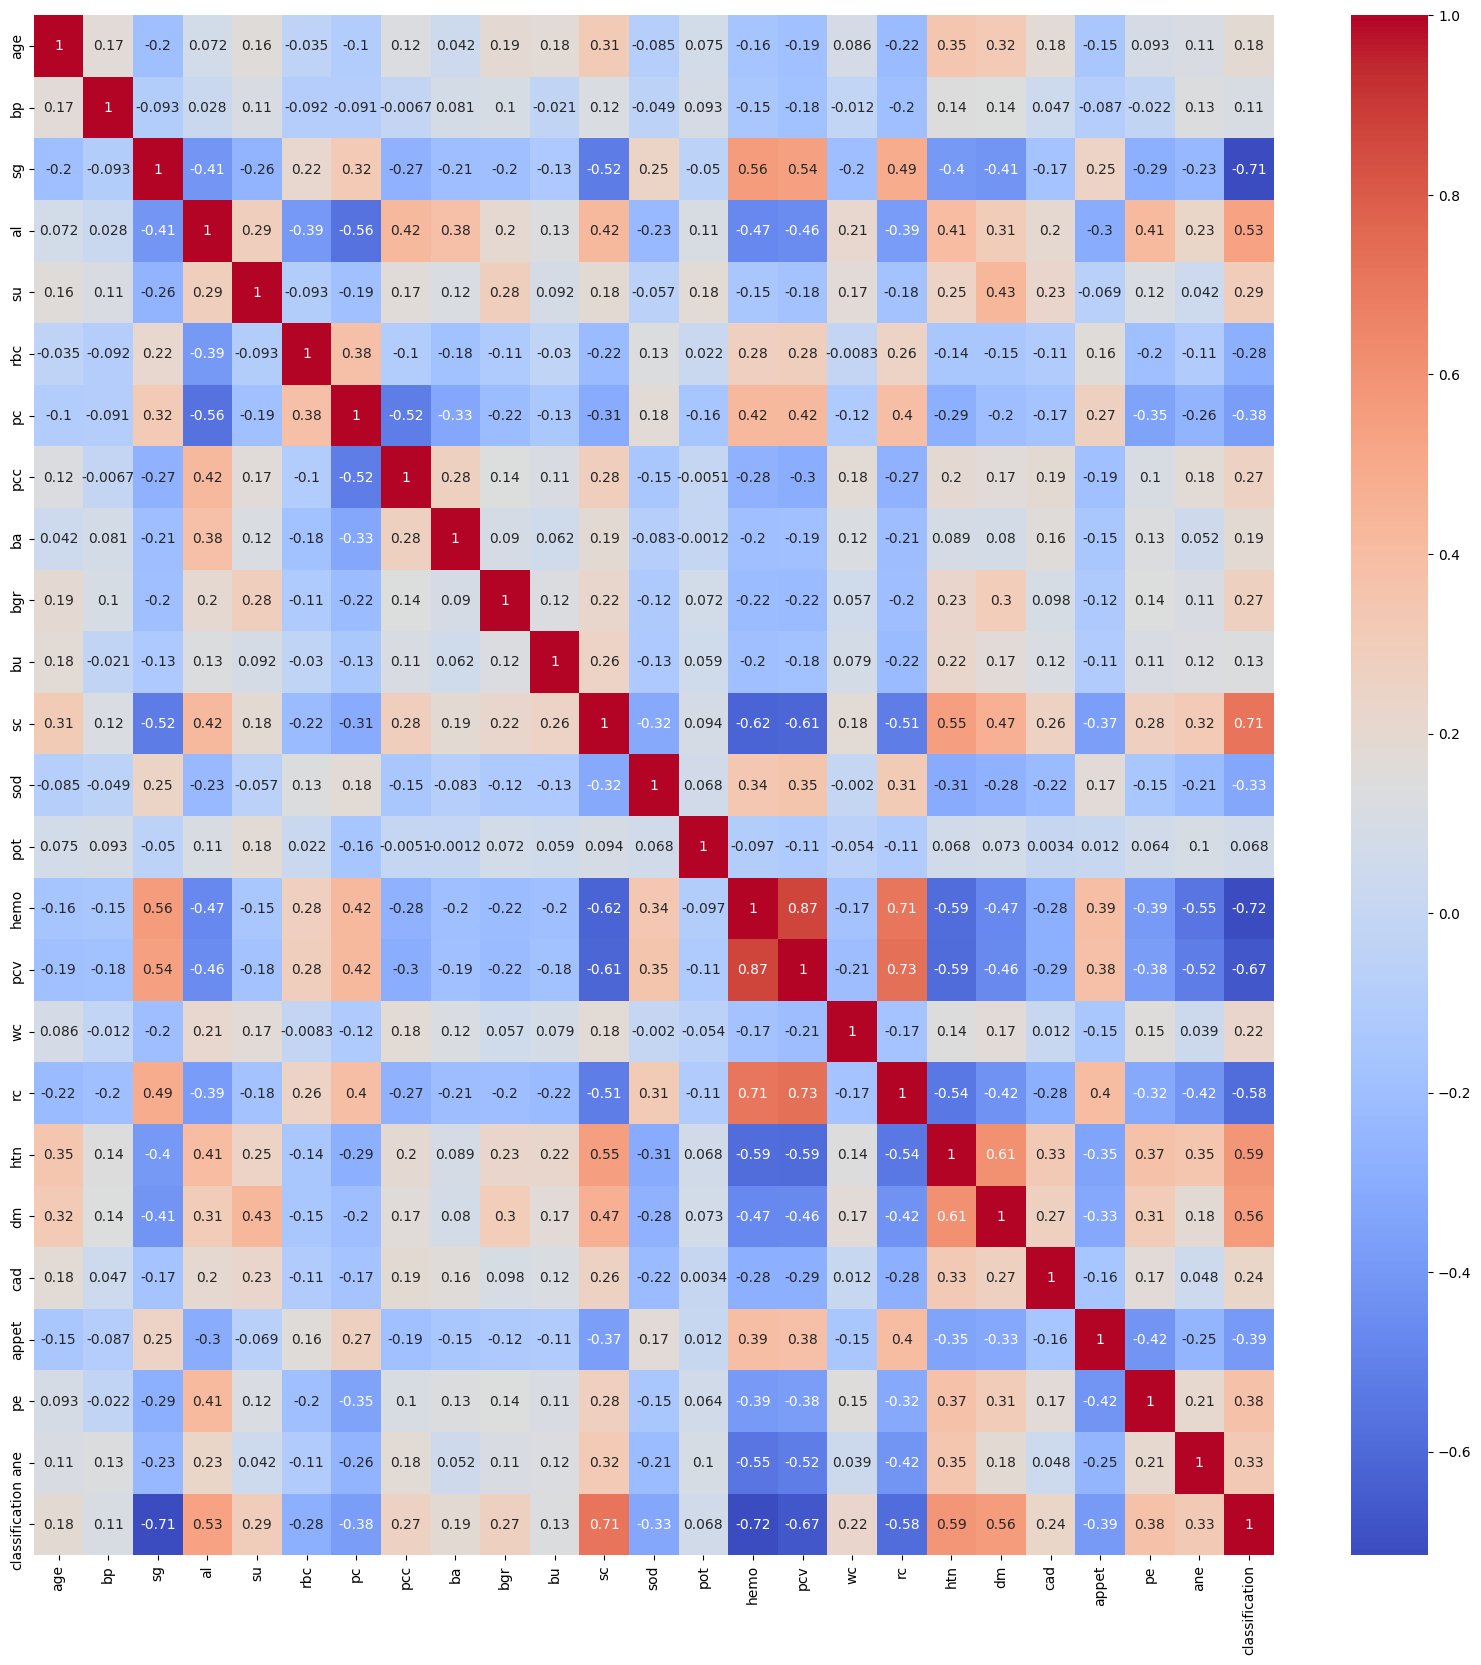

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

In [ ]:
!pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.3 MB/s eta 0:00:00


In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination
from pgmpy.estimators import BayesianEstimator

In [ ]:
col_list = data.columns.to_list()
col_list.pop()
col_list

['age',
 'bp',
 'sg',
 'al',
 'su',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane']

In [ ]:
# network_structure = [("sg", "classification"),("al", "classification"), ("dm", "classification"), ("htn", "classification"), ("classification", "ane"), ("sod", "sg"), ("bgr", "dm"), ("su", "dm"), ("pcv", "rc"), ("rc", "hemo"), ("hemo", "ane"), ("dm", "htn"), ("bp", "htn"), ("cad", "htn")]
network_structure = [("su", "classification"), ("pc", "classification"), ("classification", "al"), ("classification", "bu"), ("classification", "sc"), ("bp", "classification"), ("age", "su"), ("bgr", "su"), ("dm", "su"), ("age", "bp"), ("ba", "pc"), ("pcc", "pc")]
print(network_structure)

[('su', 'classification'), ('pc', 'classification'), ('classification', 'al'), ('classification', 'bu'), ('classification', 'sc'), ('bp', 'classification'), ('age', 'su'), ('bgr', 'su'), ('dm', 'su'), ('age', 'bp'), ('ba', 'pc'), ('pcc', 'pc')]


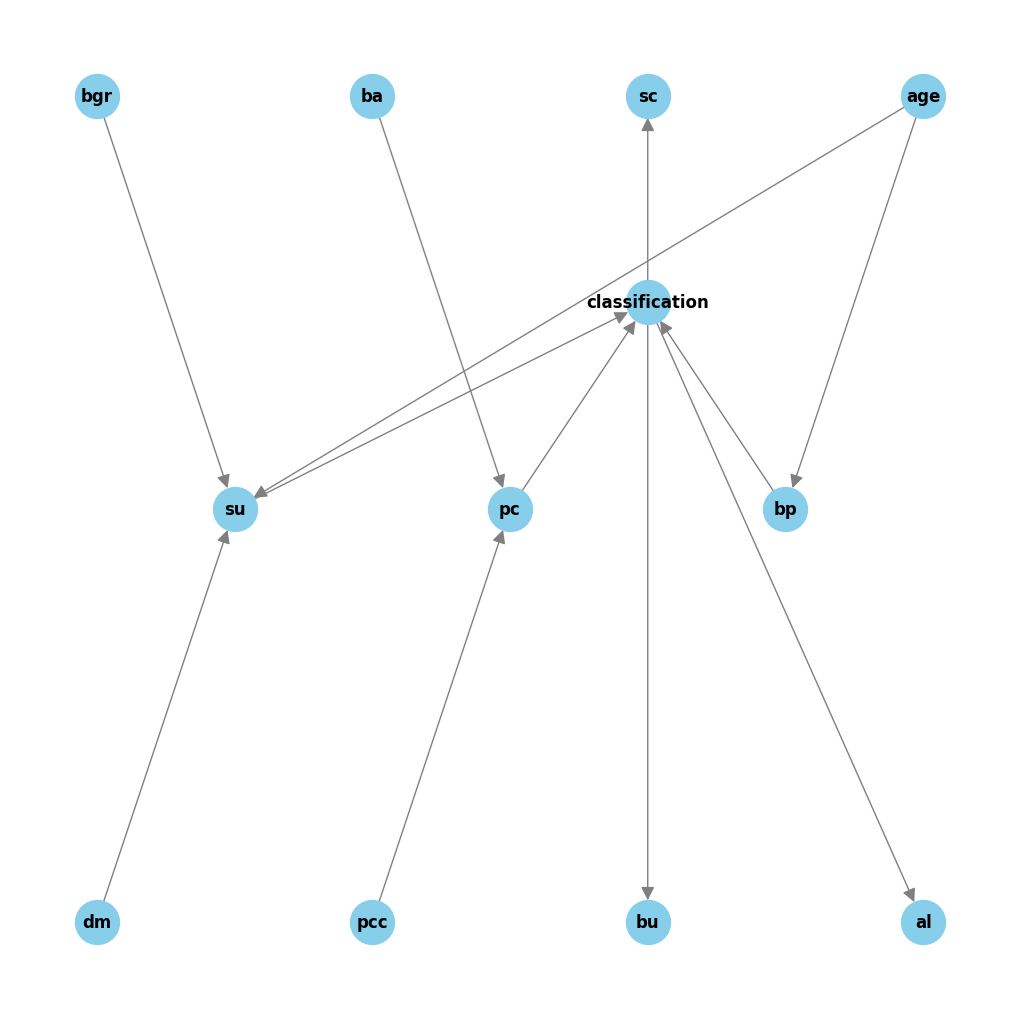

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

edges = [("su", "classification"), ("pc", "classification"), ("classification", "al"), ("classification", "bu"), ("classification", "sc"), ("bp", "classification"), ("age", "su"), ("bgr", "su"), ("dm", "su"), ("age", "bp"), ("ba", "pc"), ("pcc", "pc")]

G = nx.DiGraph()

G.add_edges_from(edges)

pos = {
    "bgr": (0, 2),
    "dm": (0, 0),
    "su": (2, 1),
    "ba": (4, 2),
    "pcc": (4, 0),
    "pc": (6, 1),
    "sc": (8, 2),
    "bu": (8, 0),
    "bp": (10, 1),
    "age": (12, 2),
    "al": (12, 0),
    "classification": (8, 1.5)
}
plt.figure(figsize=(10, 10))

nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=1000, node_color='skyblue', edge_color='gray', arrowsize=20)

plt.show()

In [ ]:
model = BayesianNetwork(network_structure)

In [ ]:
model.fit(data, estimator=BayesianEstimator)

In [ ]:
for cpd in model.get_cpds():
    print("CPD for {}: ".format(cpd.variable))
    print(cpd)
    print("===")

CPD for su: 
+---------+----------------------+-----+----------------------+
| age     | age(0)               | ... | age(2)               |
+---------+----------------------+-----+----------------------+
| bgr     | bgr(0)               | ... | bgr(2)               |
+---------+----------------------+-----+----------------------+
| dm      | dm(0.0)              | ... | dm(1.0)              |
+---------+----------------------+-----+----------------------+
| su(0.0) | 0.818840579710145    | ... | 0.5513632365875111   |
+---------+----------------------+-----+----------------------+
| su(1.0) | 0.036231884057971016 | ... | 0.09542656112576958  |
+---------+----------------------+-----+----------------------+
| su(2.0) | 0.036231884057971016 | ... | 0.13342128408091472  |
+---------+----------------------+-----+----------------------+
| su(3.0) | 0.036231884057971016 | ... | 0.11442392260334215  |
+---------+----------------------+-----+----------------------+
| su(4.0) | 0.0362318840579

In [ ]:
inference = VariableElimination(model)

In [ ]:
for i in range(0, 3):
  predicted = inference.query(variables=['classification'], evidence={'bp': data['bp'][i], "pcc": data['pcc'][i]})
  print(predicted)

+-------------------+-----------------------+
| classification    |   phi(classification) |
+===================+=======================+
| classification(0) |                0.3781 |
+-------------------+-----------------------+
| classification(1) |                0.6219 |
+-------------------+-----------------------+
+-------------------+-----------------------+
| classification    |   phi(classification) |
+===================+=======================+
| classification(0) |                0.4048 |
+-------------------+-----------------------+
| classification(1) |                0.5952 |
+-------------------+-----------------------+
+-------------------+-----------------------+
| classification    |   phi(classification) |
+===================+=======================+
| classification(0) |                0.3781 |
+-------------------+-----------------------+
| classification(1) |                0.6219 |
+-------------------+-----------------------+


In [ ]:
for i in range(0, 3):
  predicted = inference.query(variables=['classification'], evidence={'bp': data['bp'][i], "pcc": data['pcc'][i]})
  print(predicted)

In [ ]:
for i in range(0, 3):
  predicted = inference.query(variables=['classification'], evidence={'bp': data['bp'][i], "pcc": data['pcc'][i]})
  print(predicted)